# Fundamental 10. 탐색적 데이터 분석 EDA

### 라이브러리 가져오기
EDA 과정에서 사용할 `numpy`, `pandas`, `seaborn`, `matplotlib` 등의 라이브러리들을 `import` 한다.  

`seaborn`, `matplotlib` 은 데이터를 그래프 등으로 시각화 할때 쓰인다.  
`matplotlib`는 비교적 단순한 그래프를 그리고, `seaborrn` 은 보다 고급화된 그래프를 그린다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 데이터셋 불러오기
데이터셋을 `pandas` 로 불러온다. 
원본 데이터를 `original_data` 에 저장을 하고, 원본 데이터는 그대로 두기 위해 원본 데이터를 복사해서 `pokemon` 변수에 저장한다.

In [2]:
import os
csv_path = os.getenv("HOME")+'/aiffel/pokemon_eda/data/Pokemon.csv'
original_data = pd.read_csv(csv_path)

In [3]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


데이터는 총 800개, 특성은 13개임을 알 수 있다.

여기서 __전설의 포켓몬 (Legendary)인지 아닌지 분류하는 모델__ 을 만들려고한다.  
`Legendary == True` 인 데이터는 `legendary`  
`Legendary == False` 인 데이터는 `ordinary` 에 저장한다.

In [4]:
legendary = pokemon[pokemon['Legendary']==True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
ordinary = pokemon[pokemon['Legendary']==False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


800개의 데이터 중 65개의 데이터가 Legandary 임을 알 수 있다.

### 결측치 확인

In [6]:
pokemon.isnull().sum()   # 결측치 갯수 확인

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### 전체 columns 관찰

In [7]:
print(len(pokemon.columns)) ## 전체 columns 출력
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

각 columns 가 가진 의미는 다음과 같다.

- \# : 포켓몬 Id number. `int`  
- Name : 포켓몬 이름.  `str(unique)`  
- Type 1 : 첫 번째 속성. `str`  
- Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. `str`  
- Total : 전체 6가지 스탯의 총합. `int`
- HP : 포켓몬의 체력. `int`
- Attack : 물리 공격력.  `int`
- Defense : 물리 공격에 대한 방어력. `int`
- Sp. Atk : 특수 공격력. `int`
- Sp. Def : 특수 공격에 대한 방어력. `int`
- Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격) `int`
- Generation : 포켓몬의 세대. `int`
- Legendary : 전설의 포켓몬 여부 -> __Target feature__ `bool`


### 각 colum 관찰

### `#` : ID Number

In [8]:
len(set(pokemon["#"]))

721

전체 데이터는 800개 지만 # 값은 721개로 나온다. 파이썬의 `set` 자료형은 중복 데이터를 가질 수 없다. 즉 `#` 칼럼의 값은 unique 하지않다는 것을 알 수 있다.  

같은 `#` 값을 가지는 포켓몬을 보자.

In [9]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


같은 값의 # 가 있음을 알 수 있다. 기본 포켓몬인 Charizard로부터 시작해서 진화한 Meaga Charizard가 있고, X, Y는 성별을 나타내는 것으로 보인다.

### `Name` : 이름

In [10]:
len(set(pokemon["Name"]))

800

모든 이름이 다른 값을 가진다. 즉, Unique 함을 알 수 있다.

### `Type1`, `Type2` : 포켓몬 속성  

무작위로 2개의 포켓몬 데이터를 보자.

In [11]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


6번 포켓몬인 Charizard는 Fire와 Flying 속성을 가지고 있고, 8번 포켓몬인 Wartortle은 Water 속성 한가지만 가지고 있다.  

포켓몬이 가지는 속성은 기본적으로 하나, 또는 최대 두개까지 가질 수 있는 것을 알 수 있다.
특히, 데이터 셋에서 한개의 속성을 가지는 포켓몬은 Type 1에만 속성이 표시되고, Type 2에는 NaN 값이 들어가 있다.

그럼 각 속성의 종류는 총 몇가지인지 보자.

In [12]:
len(list(set(pokemon['Type 1']))), len(list(set(pokemon['Type 2'])))

(18, 19)

Type 1에는 총 18가지, Type 2에는 총 19가지 속성이 들어가있습니다.  
Type 가 한가지 더 많은데 왜 그런지 알아보기 위하여 각자를 집합으로 만들어 차집합을 확인해보자.

In [13]:
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

둘의 차집합은 바로 NaN 값이다. 포켓몬의 속성이 하나라면, `Type2` 에는 `NaN` 값이 들어갔음을 알 수있다.

따라서 NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 셋트의 데이터가 들어가 있음을 알 수 있다.

포켓몬들의 모든 Type을 types 변수에 저장하자.

In [14]:
types = list(set(pokemon['Type 1']))
print(len(types))
print(types)

18
['Dark', 'Poison', 'Ground', 'Rock', 'Normal', 'Psychic', 'Ghost', 'Grass', 'Fairy', 'Dragon', 'Electric', 'Fighting', 'Flying', 'Water', 'Steel', 'Bug', 'Ice', 'Fire']


`isna()` 함수를 이용해 데이터가 비어있는 NaN 값의 개수를 확인하자.

In [15]:
pokemon['Type 2'].isna().sum()

386

### `Type 1` 데이터 분포 Plot

일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 시각화를 통해 확인하자. 

`plt`의 `subplot`을 활용해서 두개의 그래프를 한번에 그리면서 그래프는 `seaborn`의 `countplot`을 사용한다.  
`countplot` 은 데이터의 개수를 표시하는 플롯이다.

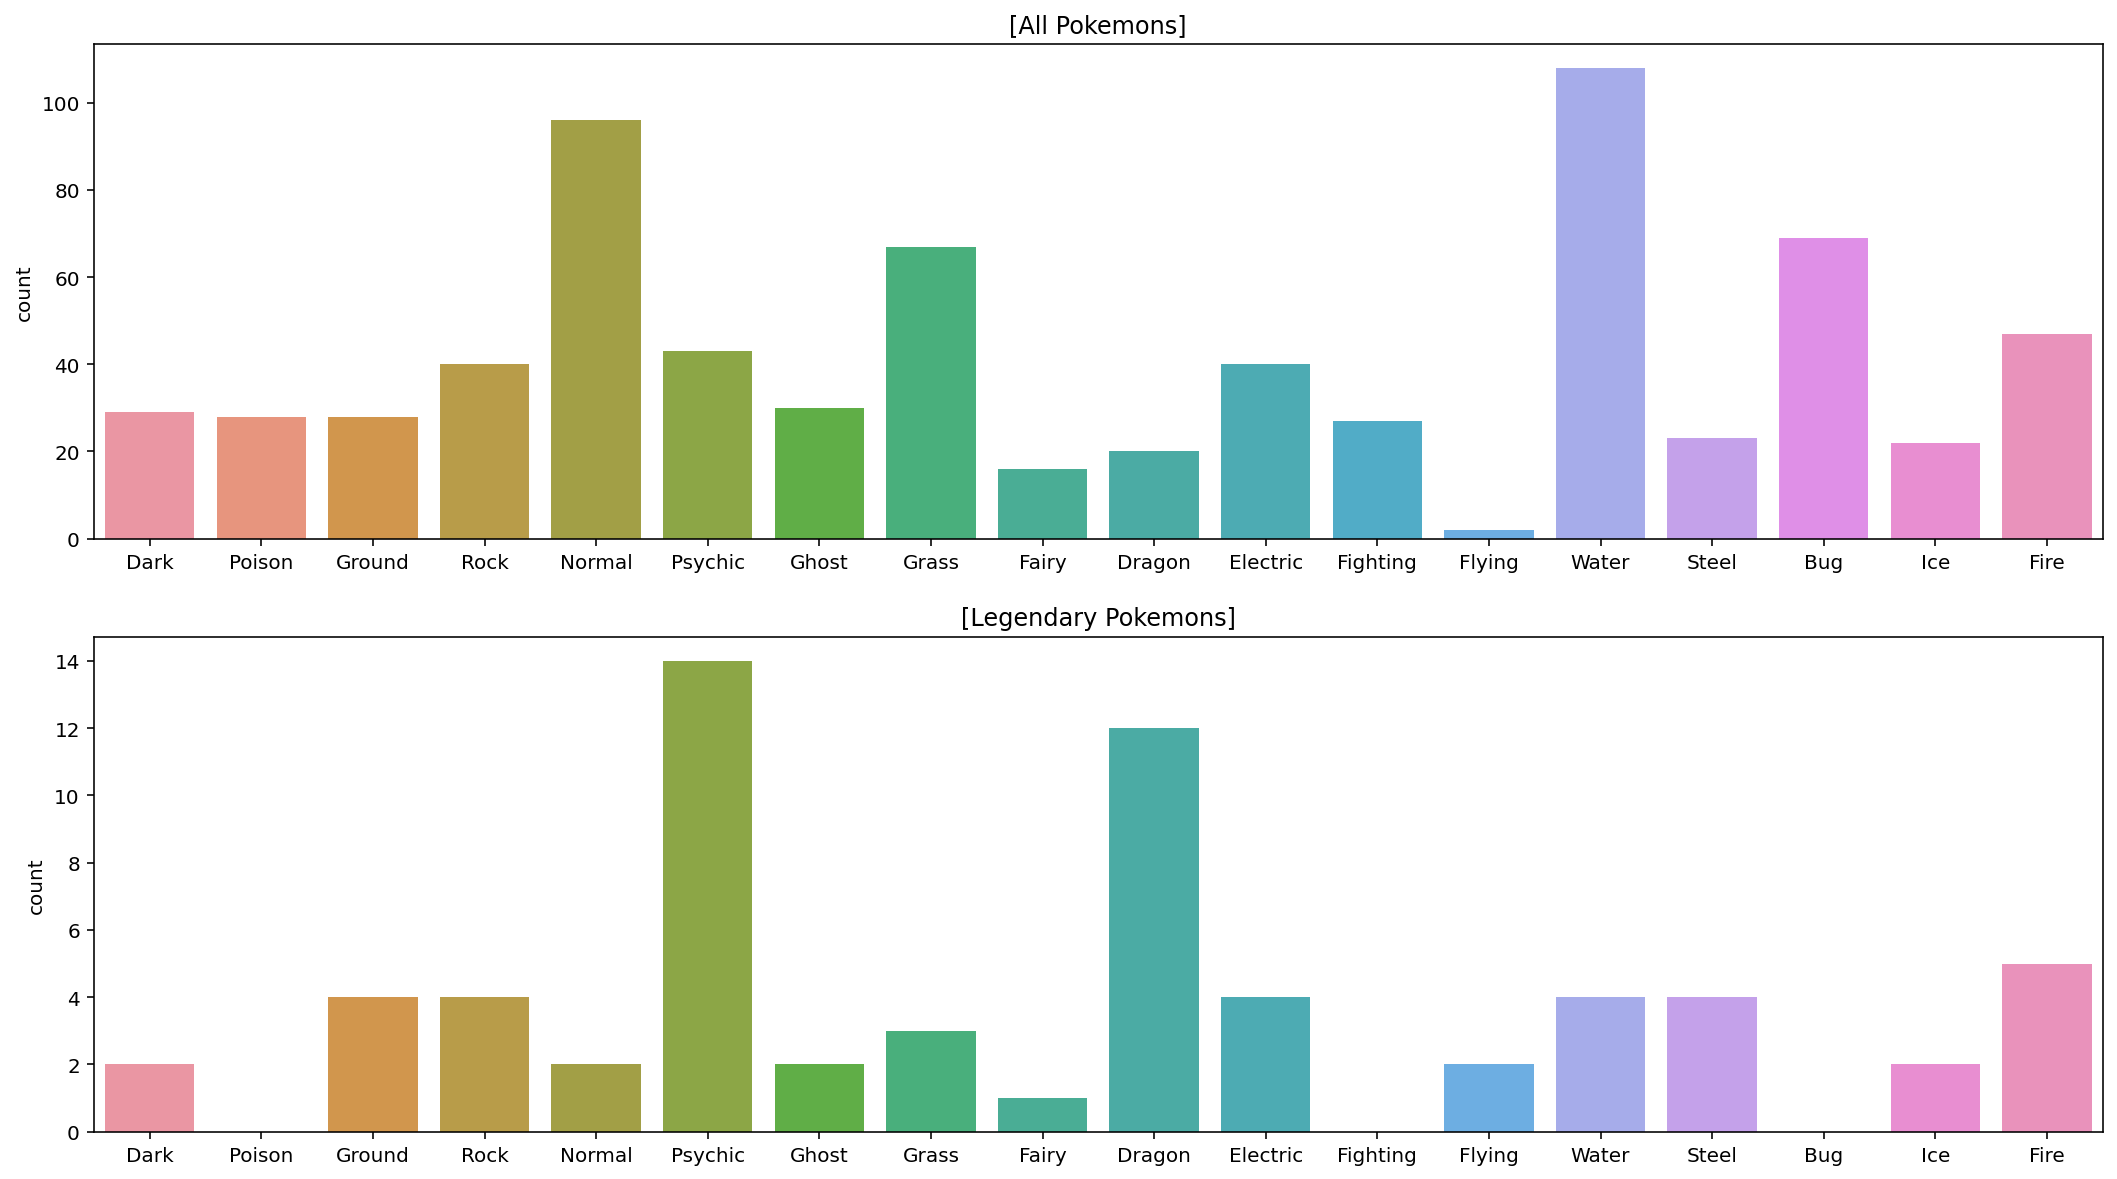

In [16]:
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order = types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order = types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

일반 포켓몬에는 Normal, Water의 속성이 가장 많지만, 전설의 포켓몬에는 Dragon, Psychic 속성이 가장 많을 것을 알 수 있다.

피벗 테이블(Pivot Table) 로 각 속성에 Legendary 포켓몬들이 몇 퍼센트씩 있는지 확인 할 수 있다.

`sort_value` 를 활용해 높은 것부터 낮은 순으로 정렬하자.

In [17]:
pd.pivot_table(pokemon, index = 'Type 1', values = 'Legendary').sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Legendary 비율이 가장 높은 속성은 `Flying` 으로, 50%의 비율을 갖는것을 확인 할 수 있다.

### `Type 2` 데이터 분포 Plot 

위와 동일하게 `countplot` 을 이용하여 데이터 분포를 확인해보자.  
`countplot`을  그릴때 결측값은 자동으로 제외된다.

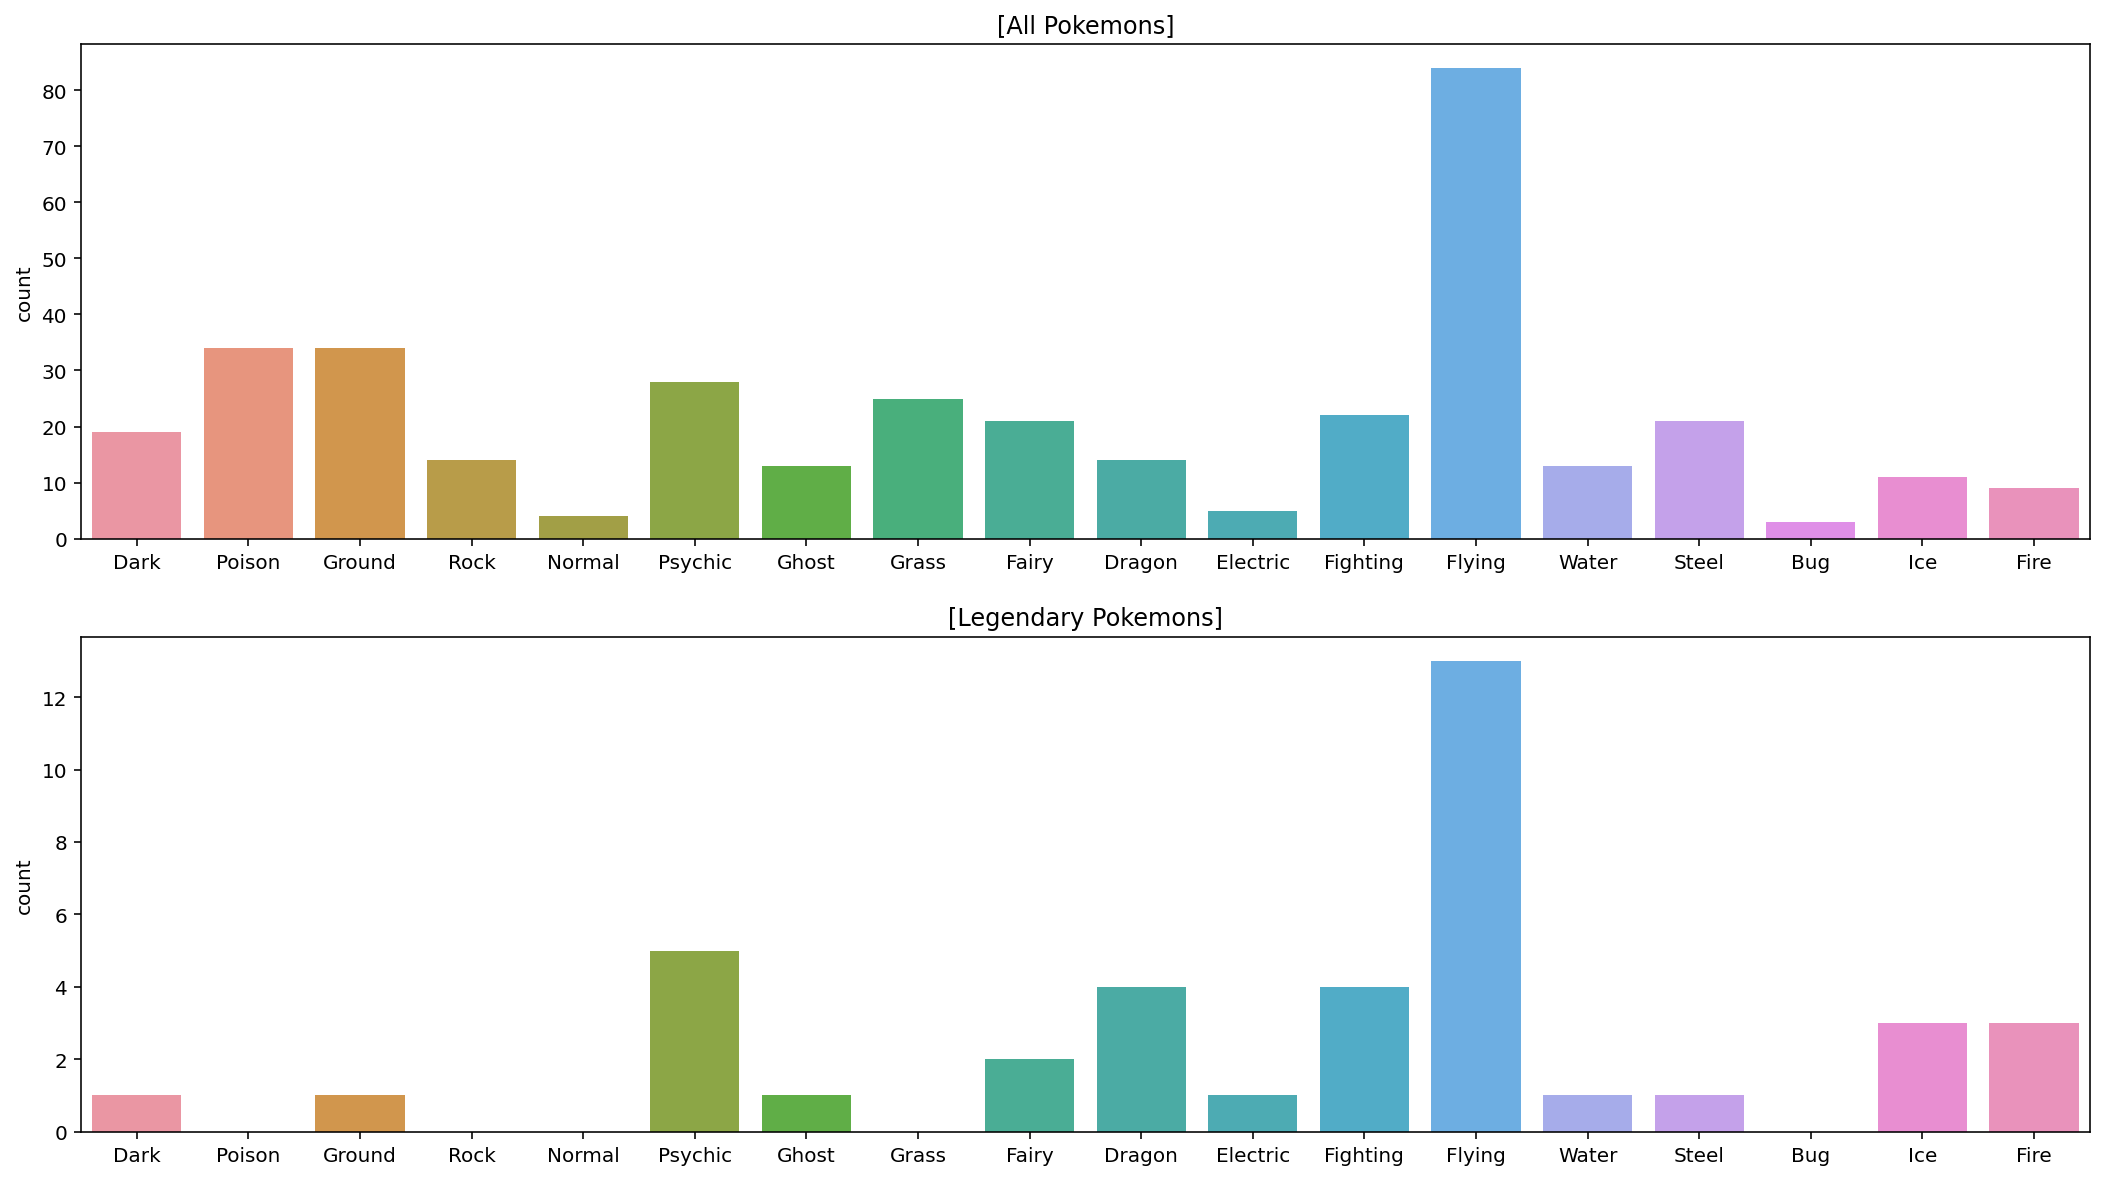

In [18]:
plt.figure(figsize = (18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x='Type 2', order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x='Type 2', order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

Type 2 또한 일반 포켓몬과 전설의 포켓몬 분포 차이가 난다.  

Flying 속성의 경우 두 경우 다 많지만, 일반 포켓몬에는 Grass, Rock, Poison같은 속성이 많은 반면 전설의 포켓몬은 하나도 없다.
대신 여전히 Dragon, Psychic과 더불어 Fighting 속성이 많다.  

역시 피벗 테이블로 한번 확인하자.

In [19]:
pd.pivot_table(pokemon, index = "Type 2", values="Legendary").sort_values(by=['Legendary'], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


`Type2` 에서는 `Fire` 속성이 25%의 비율로 가장 많은 것을 확인할 수 있다.

### `Total` : 모든 스탯의 총 합
데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가지고, `Total` 칼럼은 6가지 스탯 값의 총합이다.  

모든 스탯의 종류를 `stats`라는 변수에 저장하자.

In [20]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

6개의 스탯의 총합이 `Total` 값이 맞는지 확인하자.  

데이터 분석과정에서 __검증은 필수__ 이다.

In [21]:
print("#0 pokemon : {}\n".format(pokemon.loc[0, "Name"]))
print("Total :", int(pokemon.loc[0, "Total"]))
print("stats :", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon : Bulbasaur

Total : 318
stats : [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [22]:
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))

800

Total값과 모든 stats의 총합이 같은 포켓몬은 전체 데이터의 수와 같은 800개 이므로 전부 올바른 `Total` 값이 들어가있음을 알 수 있다.

### Total 값에 따른 분포 Plot

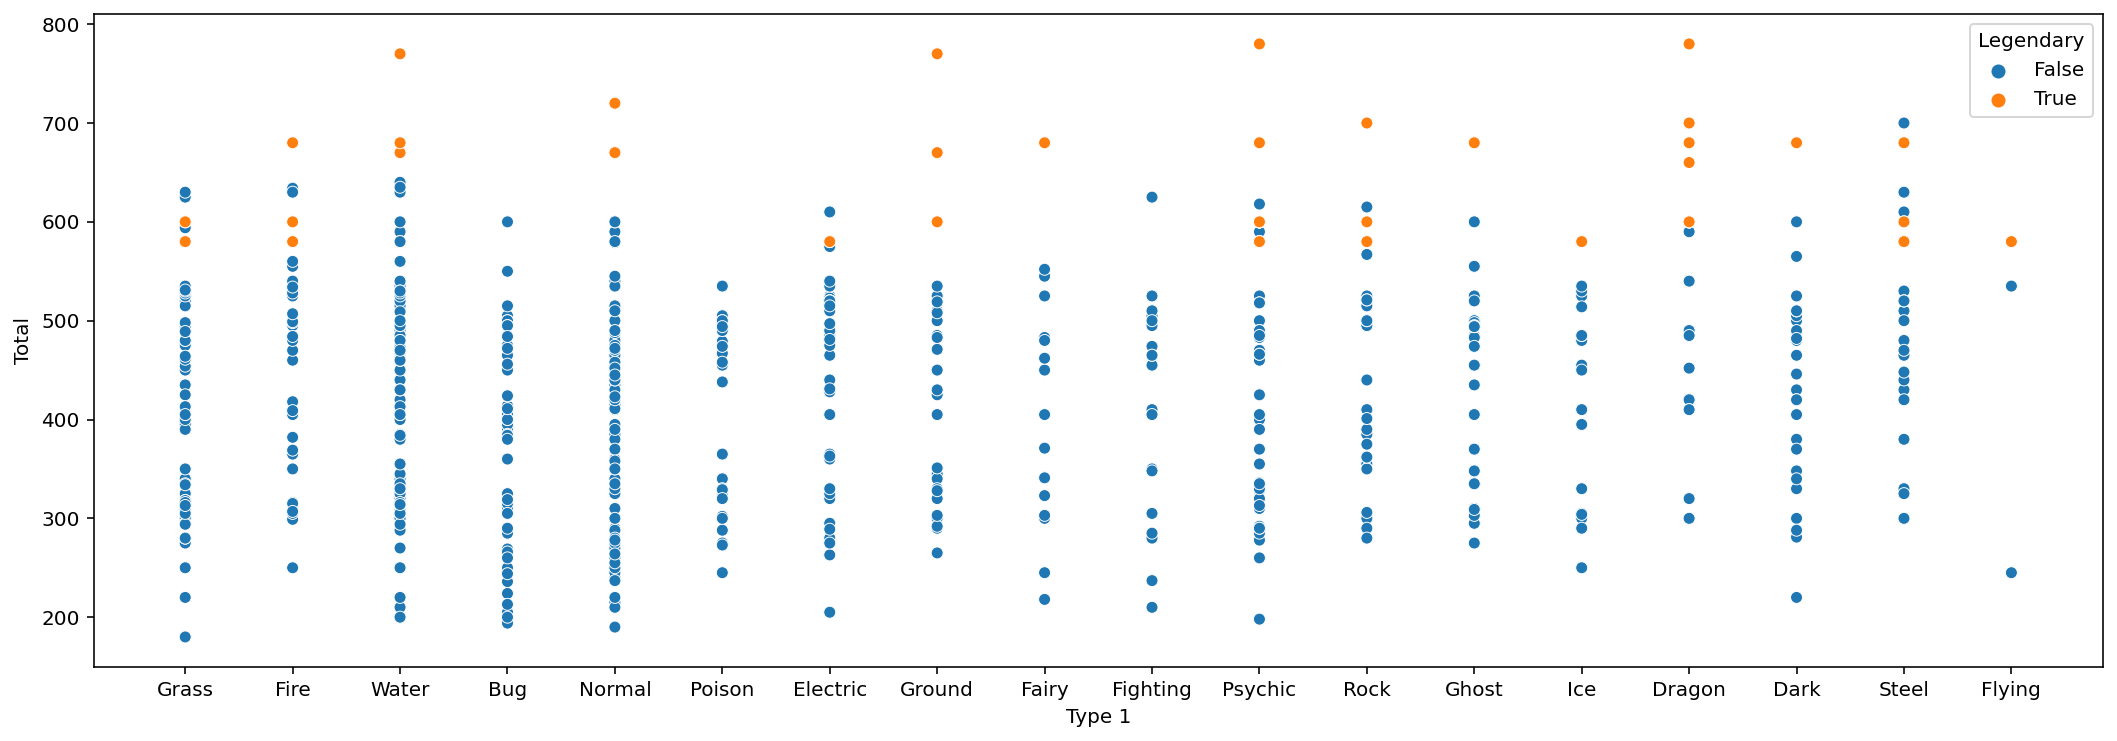

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

점의 색깔을 보면 Type 1 별로 Total 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다는 것을 알 수 있다.

### 세부 스탯 : `HP`,` Attack`, `Defense`, `Sp.Atk`, `Sp.Def`, `Speed`

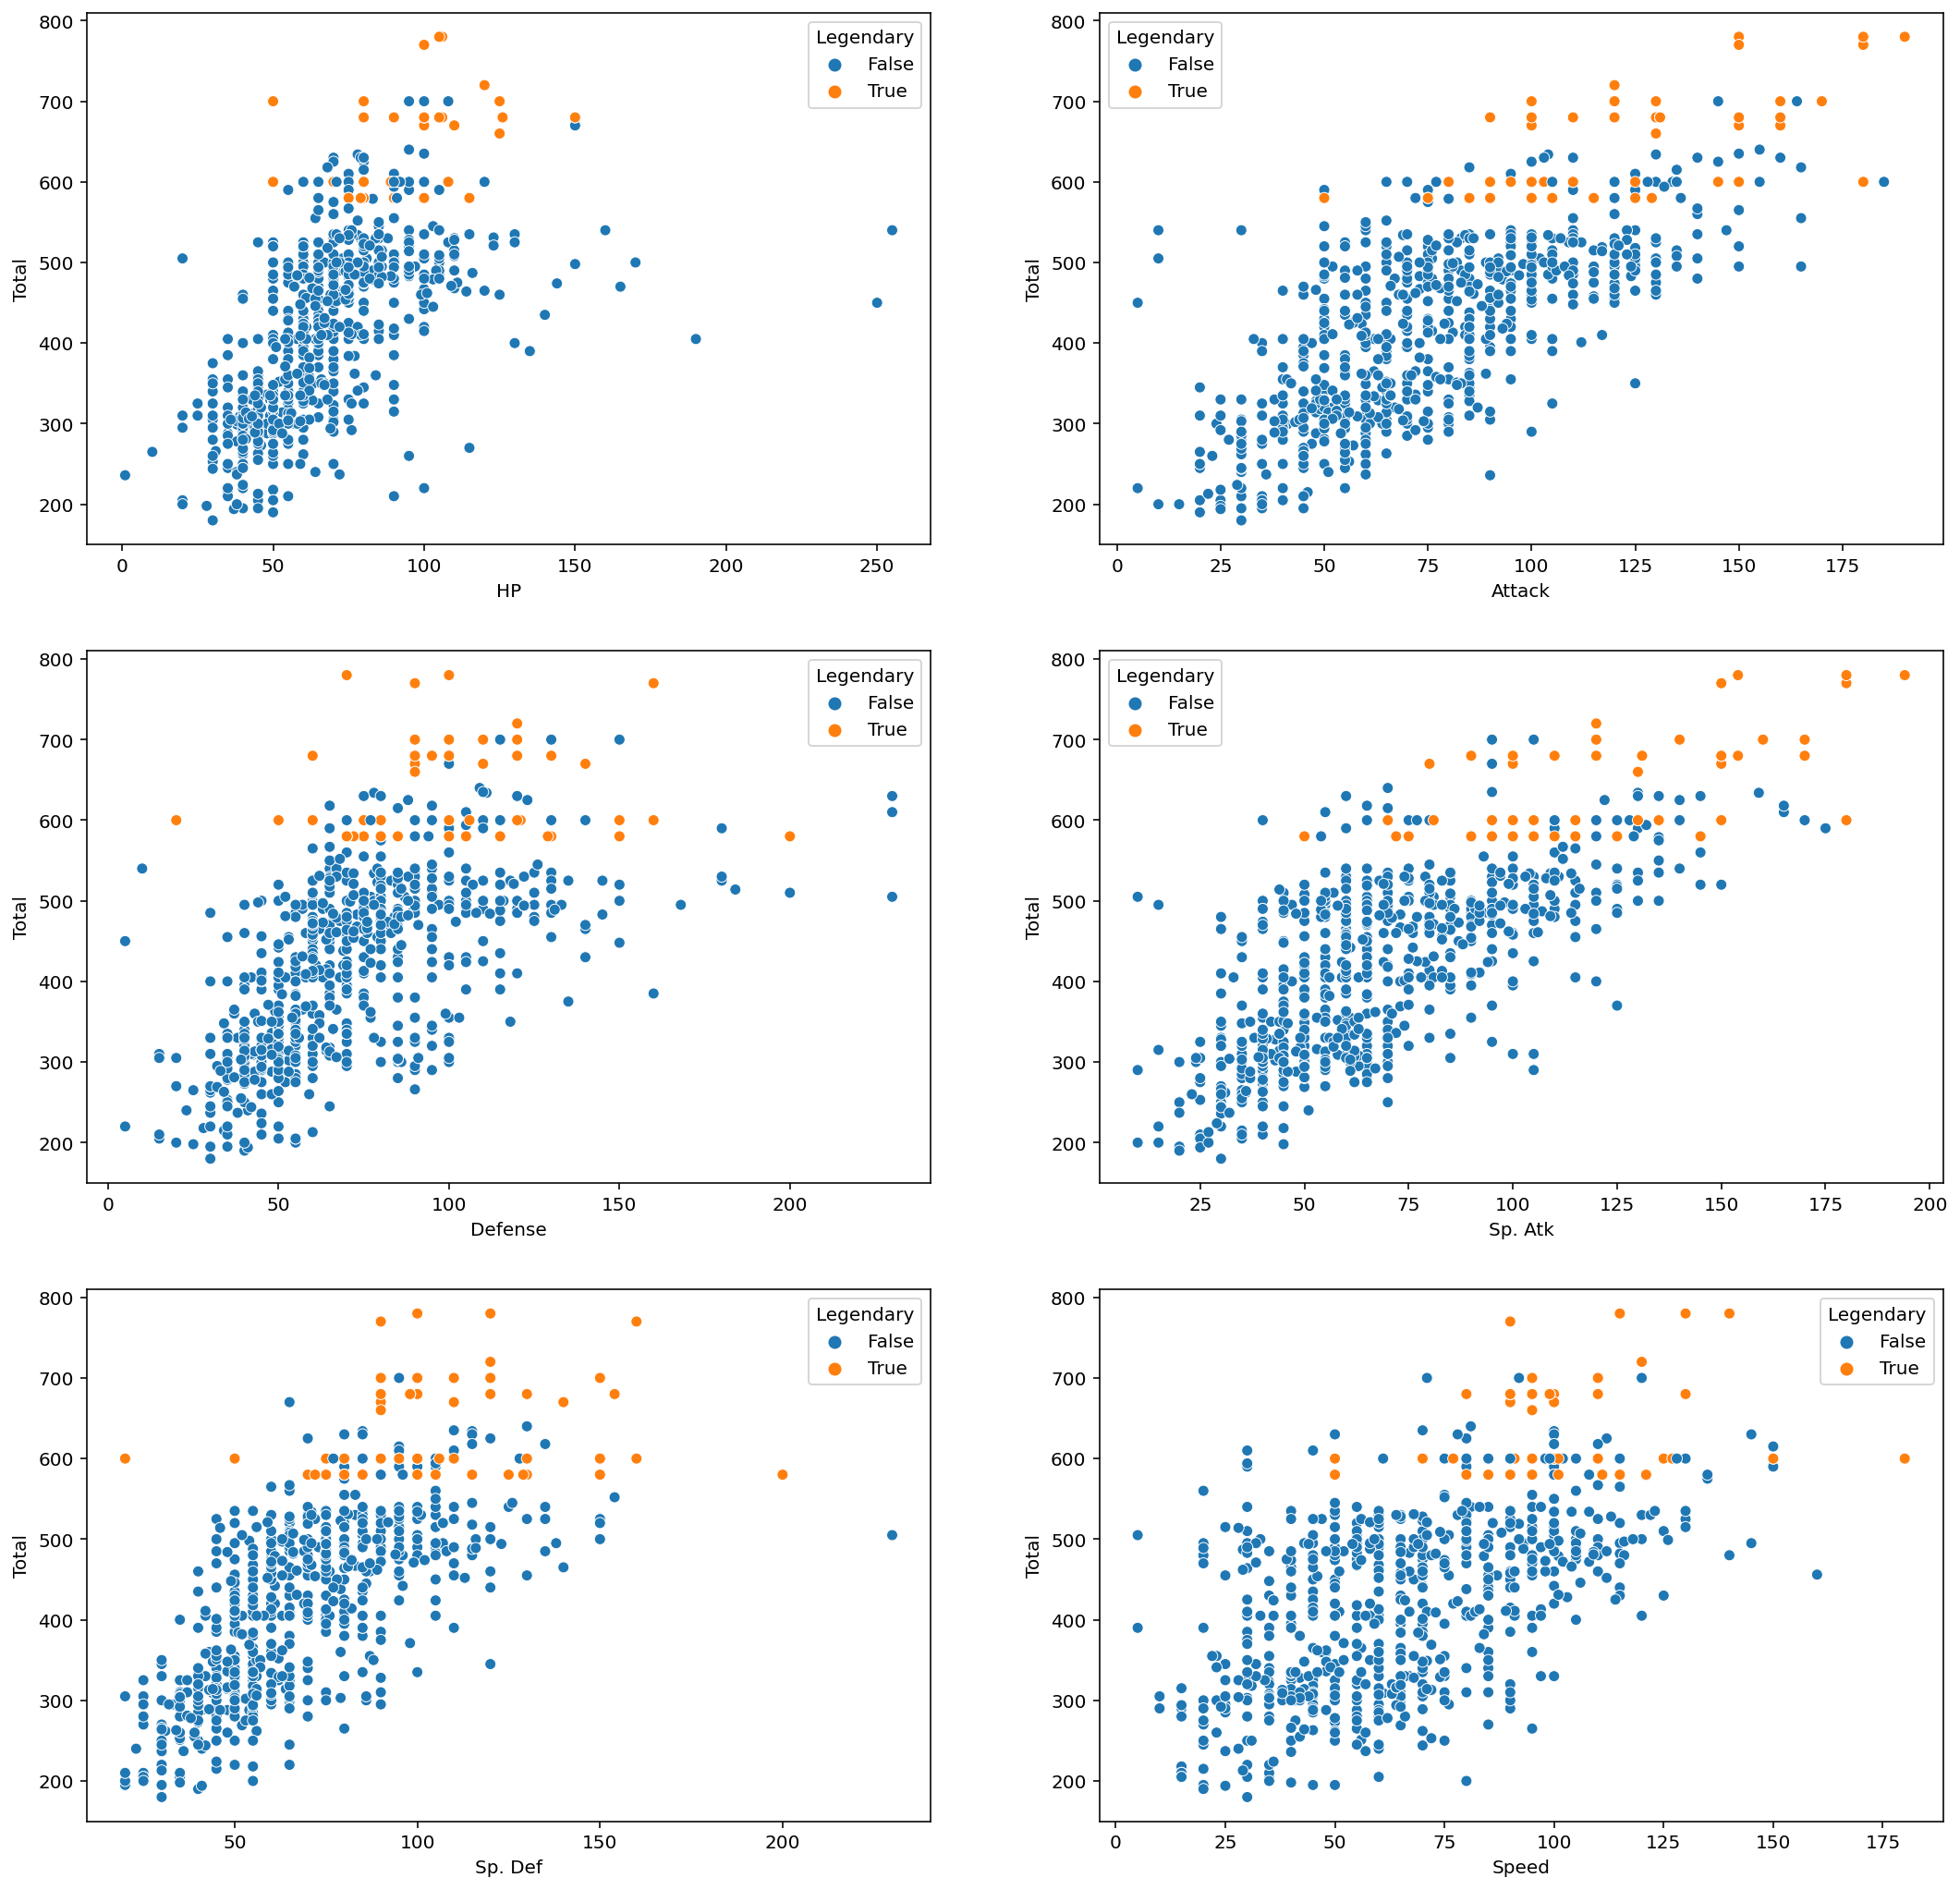

In [24]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18, 18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

각 스탯에 대한 plot 을 통해 다음과 같은 정보를 알 수 있다.

- HP, Defense, Sp. Def
  - 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있다.
  - 그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다. (ex. 방어형, 공격형 등)
  
  
- Attack, Sp. Atk, Speed
  - 이 세 가지 스탯은 Total과 거의 비례한다. 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있다.

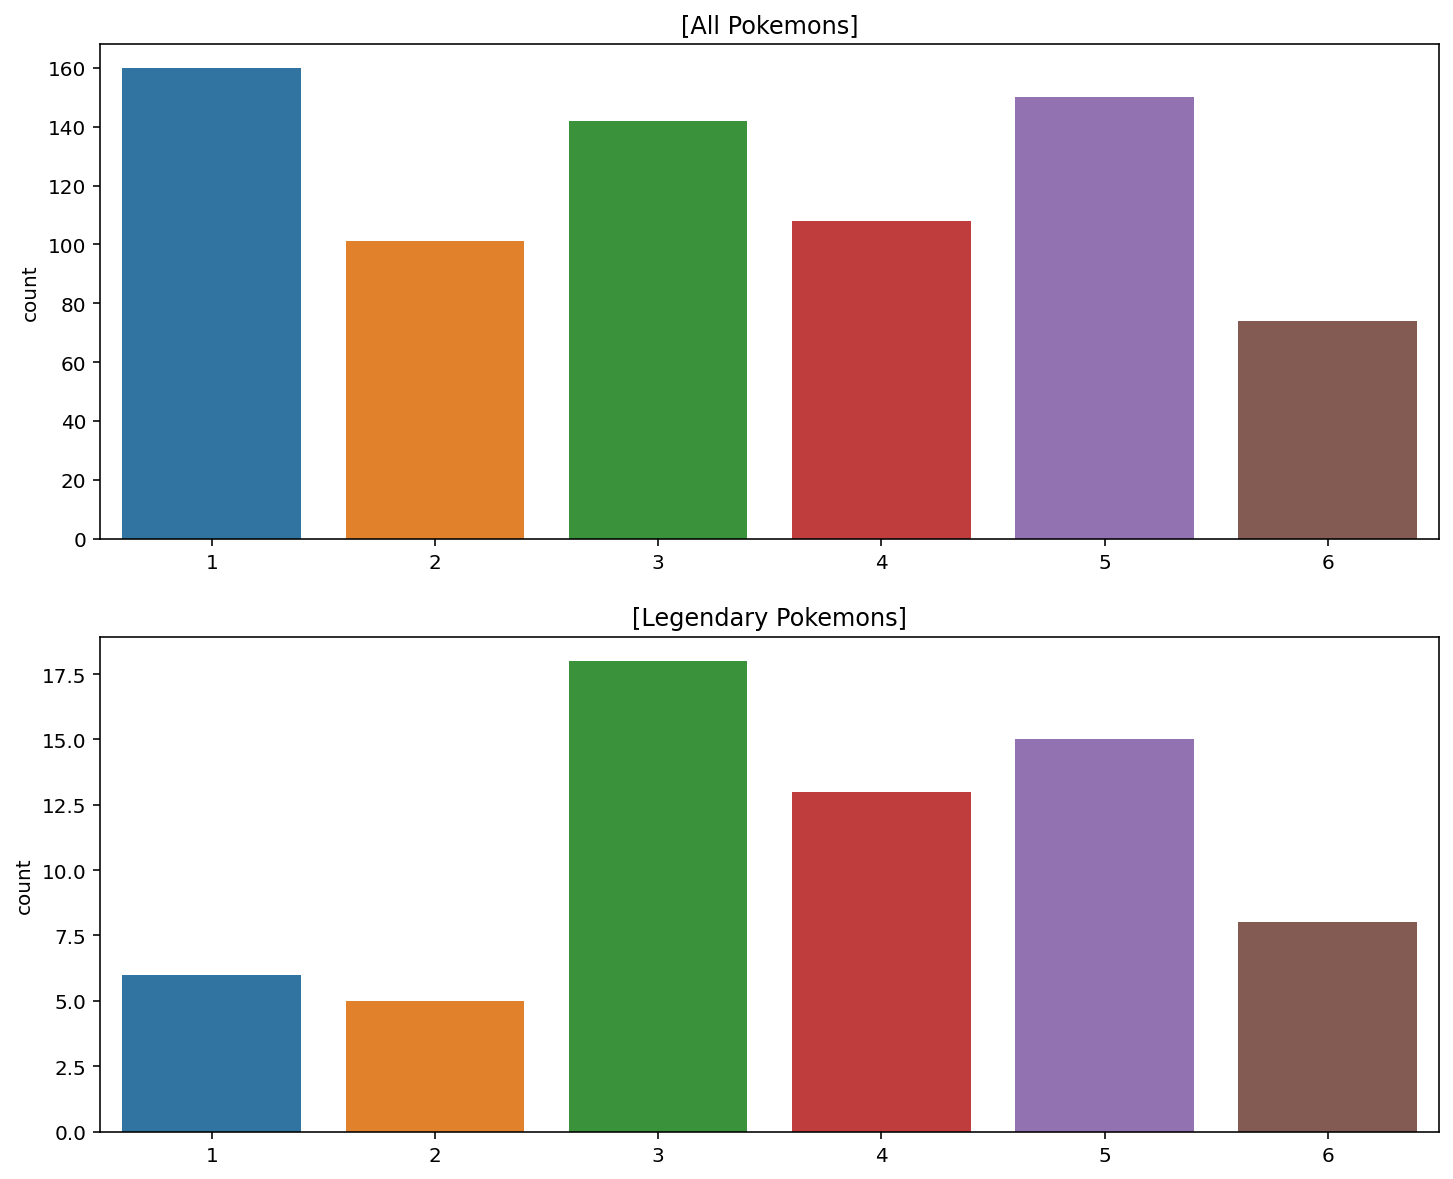

In [25]:
plt.figure(figsize=(12, 10))   

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

전설의 포켓몬은 1, 2세대에는 많지 않다. 3세대에 갑자기 많아졌다가 6세대는 또 많이 줄어든 것을 확인할 수 있다.

### 일반 포켓몬과 전설 포켓몬 차이 관찰 : Total 값

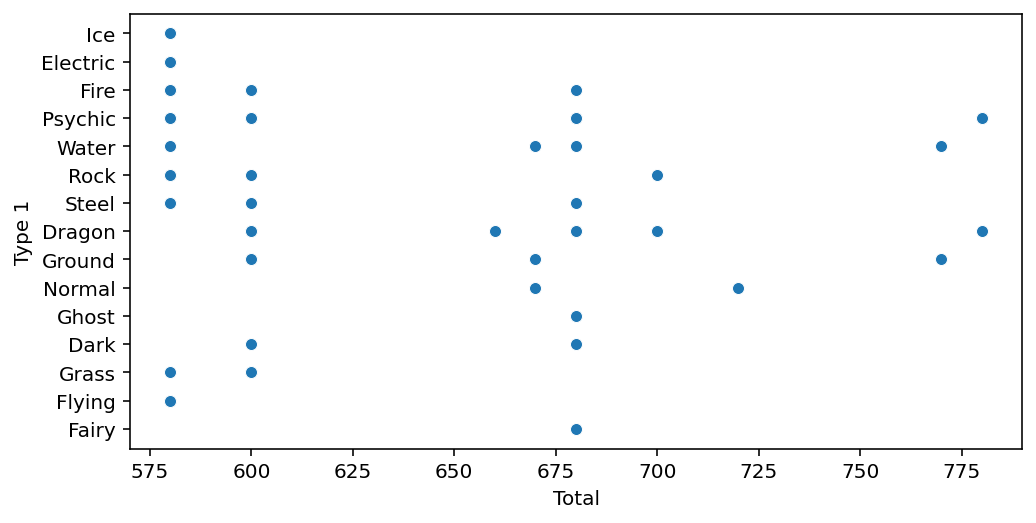

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

전설의 포켓몬들의 Total 값들이 특정 점들에 모여있음을 알 수 있다.

Total 값들의 집합을 확인해보자.

In [27]:
print(sorted(list(set(legendary['Total']))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


실제로 단 9가지 값밖에 존재하지 않는다.  
그래프로도 전설의 포켓몬이 가지는 각 Total 값에 대한 포켓몬의 수를 확인해보자

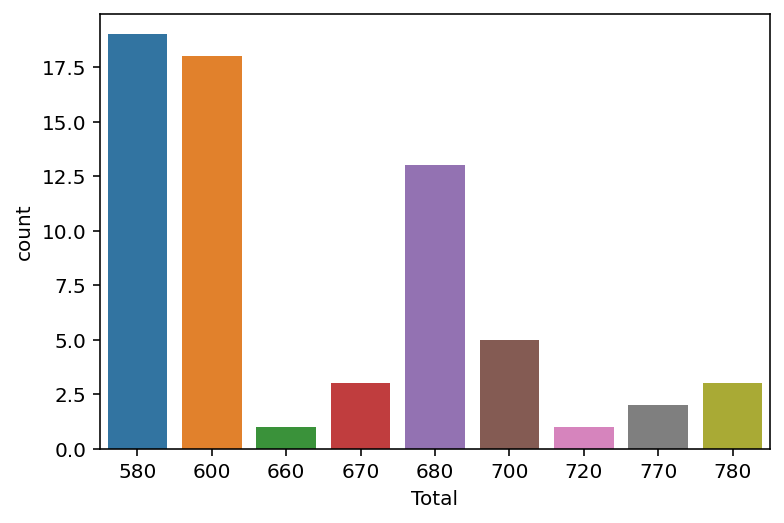

In [28]:
sns.countplot(data=legendary, x='Total')
plt.show()

총 65마리의 전설의 포켓몬이 9개의 Total값만을 가진다는 것은 약 7.22마리끼리는 같은 Total 스탯 값을 가진다는 의미와 같다.

그렇다면 ordinary 포켓몬의 경우를 확인해보자,

In [29]:
print(sorted(list(set(ordinary['Total']))))
print(len(sorted(list(set(ordinary['Total'])))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
195


735마리의 포켓몬이 195개의 값을 가진다는 것은 3.77마리만 같은 Total 스탯을 가진다는 것이다.

즉, 요약하자면

- Total 값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 된다. 즉, 전설의 포켓몬의 Total 값은 다양하지 않다.
  - 한 포켓몬의 total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.
- 전설의 포켓몬의 Total값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다. ex. 680, 720, 770, 780
  - Total 값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로 영향을 미칠 수 있다.
  

즉, Total 값은 legendary인지 아닌지를 예측하는데 중요한 칼럼임을 알 수 있다.

### 일반 포켓몬과 전설 포켓몬 차이 관찰 : Total 값

비슷한 이름을 가진 포켓몬들의 모임을 `pd.concat` 으로 합쳐보자.

In [30]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재하는 것을 확인 할 수 있다,

전설의 포켓몬은 이름의 길이도 긴 경우가 많다.
데이터셋에 이름 길이 컬럼을 생성해서 비교해보자.

In [31]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [32]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


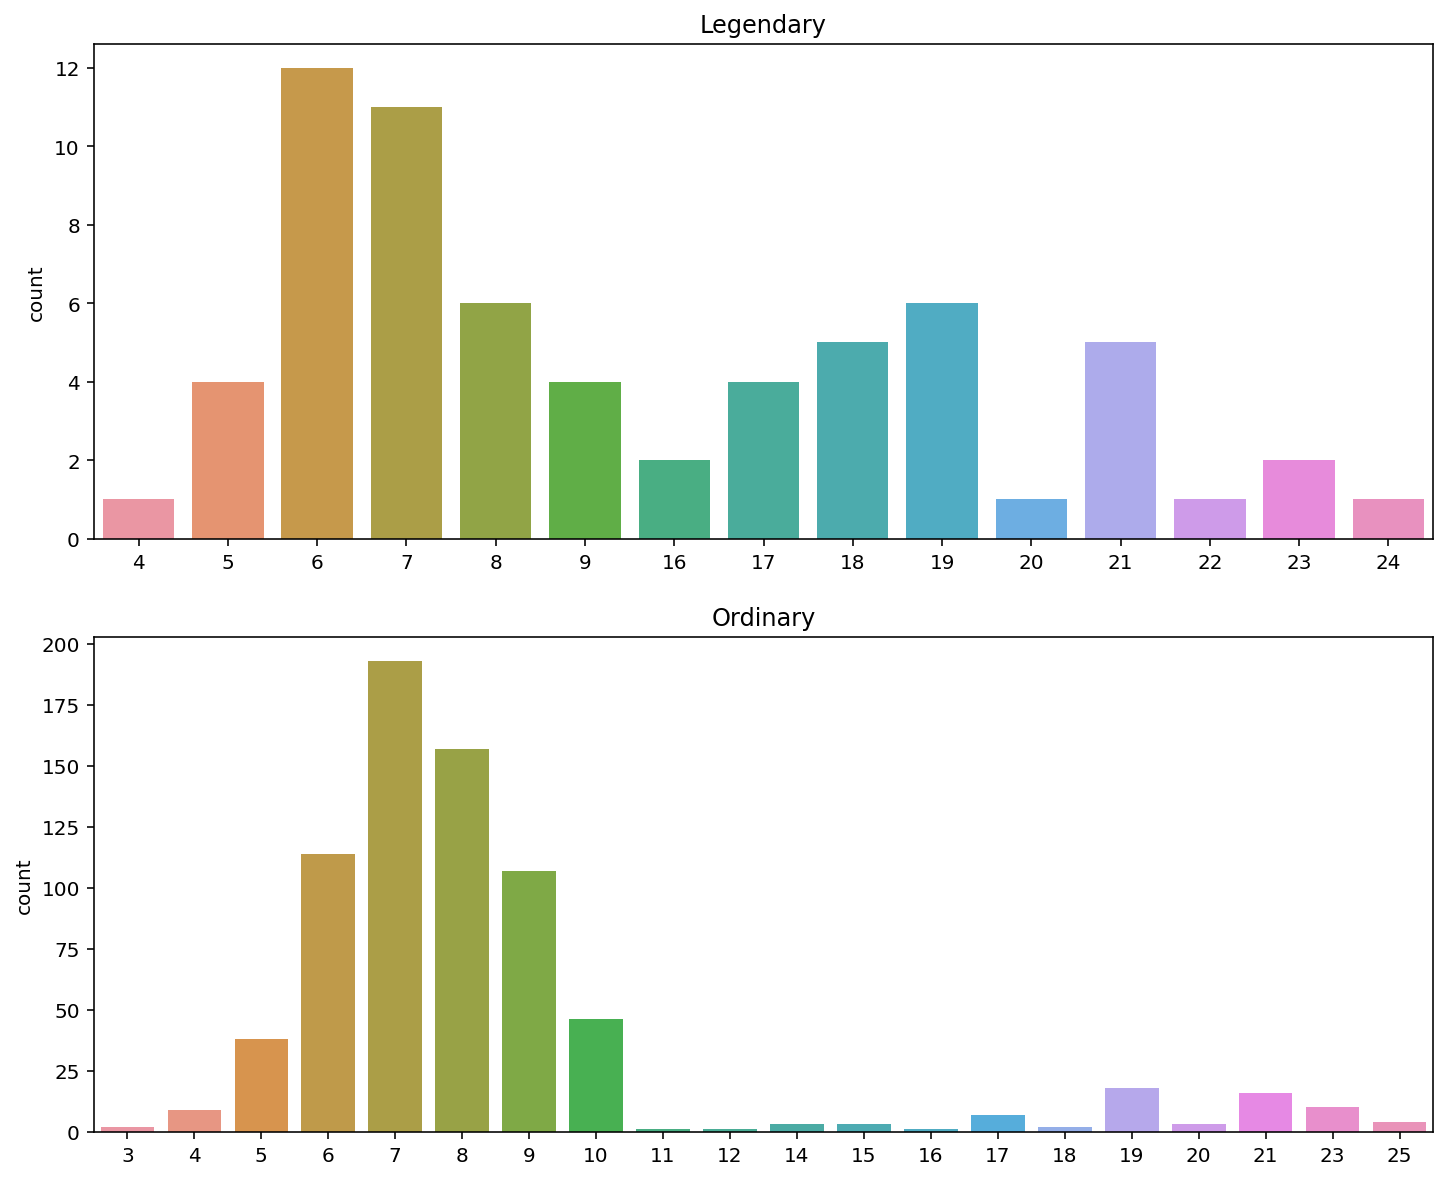

In [33]:
plt.figure(figsize=(12, 10)) 

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮은 것을 확인 할 수 있다.

In [35]:
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

41.54 %
15.65 %


전설의 포켓몬의 이름이 10 이상일 확률은 41% 를 넘으며  
일반 포켓몬의 이름이 10 이상일 확률은 약 16% 밖에 안됨을 확인할 수 있다.

요약하면, 이름에 대한 분석을 통해 다음과 같은 정보를 얻을 수 있었다.  

- 만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이다
- 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다
- 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다

__이와 같이 데이터를 다양한 방식으로 하나하나 관찰함으로써 다양한 정보들을 얻을 수 있다.__   

__EDA 를 통해 얻은 양질의 정보들을 토대로 데이터 전처리, 모델 학습, 모델 평가가 원활히 이루어질 수 있다.__